In [1]:
from regressors import *
import pickle
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
ensembleregression = EnsembleRegression(n_regressors=5,n_variables=3, eps=3, decision_boundary=0.6, global_search=False)
spatialcomparision = SpatialComparision()
smoothpredictor = SmoothingAndPredict()
ransacregressor = RansacRegressor()
huberregressor = HuberRegressor()
theilSenregressor = TheilSenRegressor()


In [23]:

n_stations = 450
n_timesteps= 100 #maybe 144 is the maximum to propoerly manage them 
k = round(n_timesteps/10)
p_noise_stations = 0.30
p_noise_timesteps= 0.30
print("# of noises:", n_stations * n_timesteps * p_noise_stations * p_noise_timesteps)
print("# of data :", n_stations * n_timesteps )

data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations=p_noise_stations, p_noise_timesteps= p_noise_timesteps)

executor = Executor(data, smoothpredictor)
executor2 = Executor(data, huberregressor)
executor3 = Executor(data, spatialcomparision)

# of noises: 4050.0
# of data : 45000


In [24]:

result = executor.evaluate_validator()
[result['precision'], result['recall'], result['f1']]

[0.981, 0.96, 0.97]

In [25]:

result2 = executor2.evaluate_validator()
[result2['precision'], result2['recall'], result2['f1']]

[0.983, 0.98, 0.981]

In [7]:

result3 = executor3.evaluate_validator()
[result3['precision'], result3['recall'], result3['f1']]

[0.924, 0.542, 0.683]

In [8]:
ts_data = data.ts_data
neighbor = data._neighbor

In [9]:
lst_stations_w_noises = list(data.dic_timesteps.keys())

In [10]:
lst_suspected_stations = [] 
for station in range(n_stations):
    y = ts_data[station] 
    X = ts_data[neighbor[station]]
    reg = LinearRegression().fit(X.T,y)
    score = reg.score(X.T, y)
    if score <0.5 : 

        lst_suspected_stations.append(station)

In [11]:
n_noises_answer = 0
n_noises_predict = 0
station = np.random.choice(list(data.dic_timesteps.keys()))
print(station)
for s in neighbor[station] : 
    if s in lst_stations_w_noises : 
        n_noises_answer +=1
        print(s)
    if s in lst_suspected_stations : 
        n_noises_predict += 1

print(n_noises_answer, n_noises_predict)

347
132
75
106
242
4 4


In [26]:
ts_station

347

6
0.1510410923797042


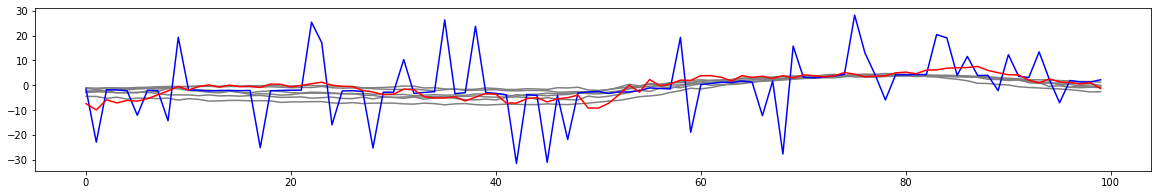

In [12]:
idx = list(set(neighbor[station]) - set(lst_suspected_stations))
print(len(idx))
y = ts_data[station]
X = ts_data[idx]

plt.figure(figsize=(20,3))
plt.plot(X.T, color='grey')
plt.plot(y, color='blue')
reg = LinearRegression().fit(X.T,y)
score = reg.score(X.T, y)
print(score)
plt.plot(reg.predict(X.T), color='red')

0.17519202177359994


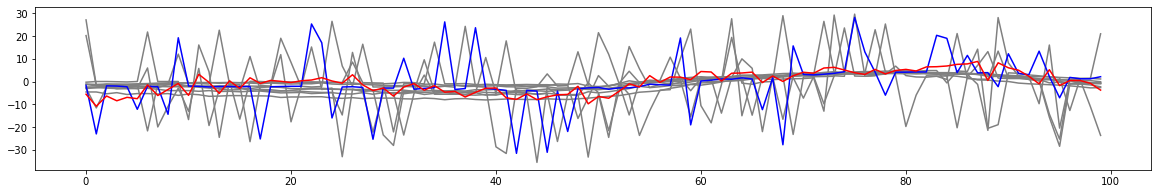

In [13]:
y = ts_data[station]
X = ts_data[neighbor[station]]

plt.figure(figsize=(20,3))
plt.plot(X.T, color='grey')
plt.plot(y, color='blue')
reg = LinearRegression().fit(X.T,y)
score = reg.score(X.T, y)
print(score)
plt.plot(reg.predict(X.T), color='red')

In [14]:
idx = (neighbor[station] >= np.inf )
for s in neighbor[station] : 
    if s in lst_suspected_stations : 
        idx = idx | (neighbor[station] == s)

<BarContainer object of 10 artists>

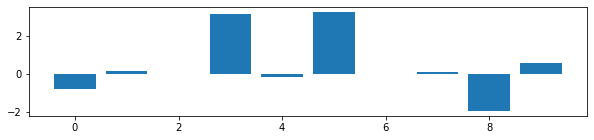

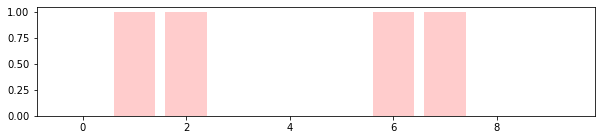

In [15]:
plt.figure(figsize=(10,2))
plt.bar(range(len(reg.coef_)), reg.coef_)
plt.figure(figsize=(10,2))
plt.bar(np.array(range(len(reg.coef_))), idx, alpha=0.2, color='red')

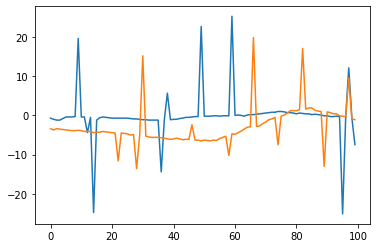

In [27]:
plt.plot(ts_data[148])
plt.plot(ts_data[184])

In [42]:
import math

10
wo noise 6.240362055701196e-14
w noise 4.300563209965251e-14


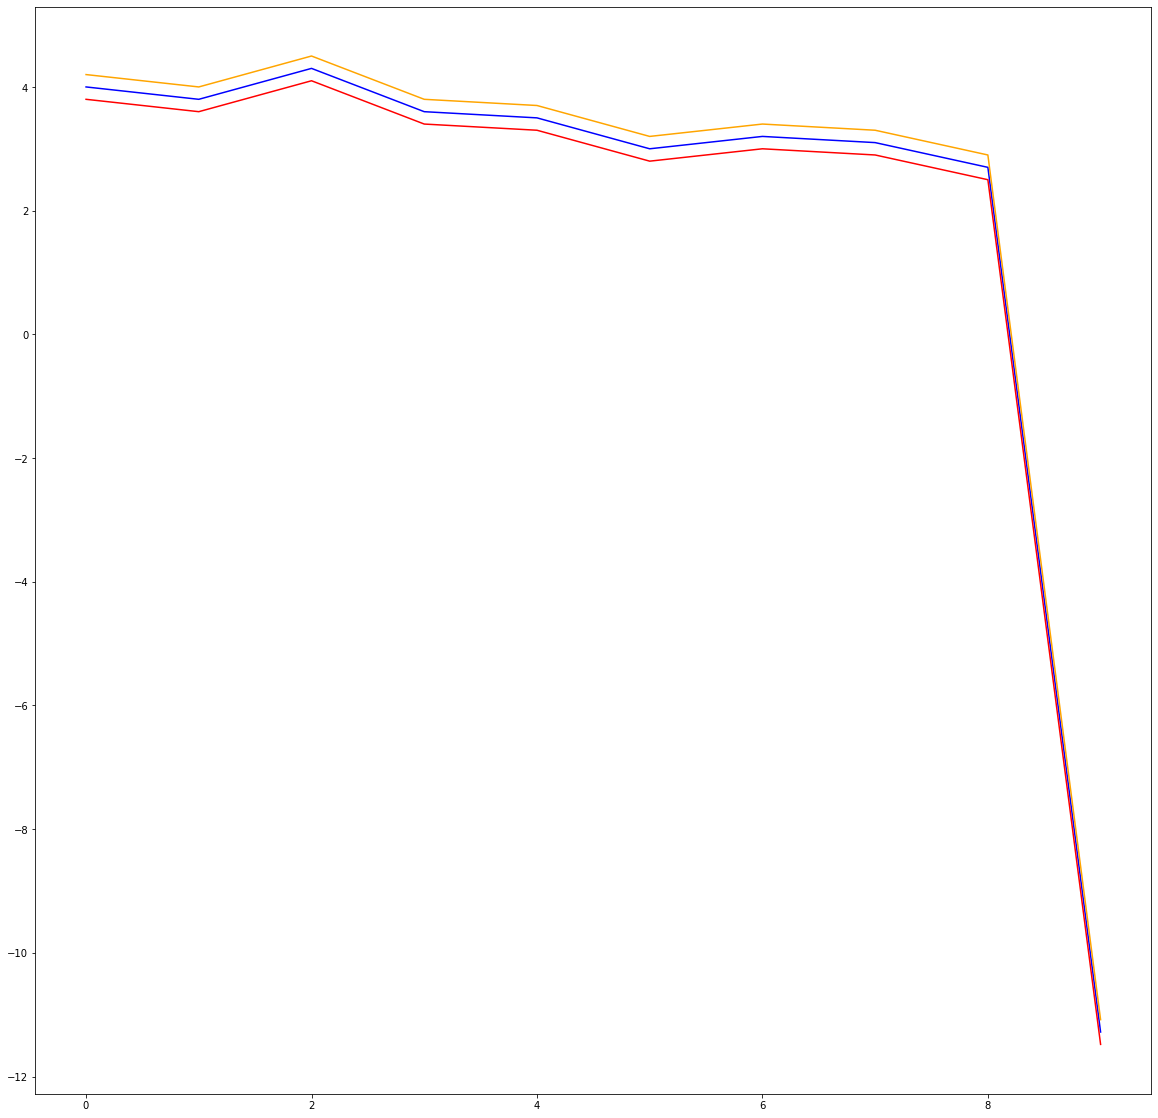

In [43]:


idx = list(set(neighbor[station]) - set(lst_suspected_stations))
print(len(idx))
y = ts_data[station]
X = ts_data[idx]
reg = LinearRegression().fit(X.T,y)
score = reg.score(X.T, y)


plt.figure(figsize=(20,20))
plt.plot(y, color='blue')
plt.plot(reg.predict(X.T)-0.2, color='red')
print("wo noise", math.sqrt(sum((y-reg.predict(X.T))**2)))


y = ts_data[station]
X = ts_data[neighbor[station]]
reg = LinearRegression().fit(X.T,y)
plt.plot(reg.predict(X.T)+0.2, color='orange')
print("w noise", math.sqrt(sum((y-reg.predict(X.T))**2)))




In [34]:

n_stations = 450
n_timesteps= 10 #maybe 144 is the maximum to propoerly manage them 
k = 10
p_noise_stations = 0.10
p_noise_timesteps= 0.10
print("# of noises:", n_stations * n_timesteps * p_noise_stations * p_noise_timesteps)
print("# of data :", n_stations * n_timesteps )

data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations=p_noise_stations, p_noise_timesteps= p_noise_timesteps)

executor = Executor(data, smoothpredictor)
executor2 = Executor(data, huberregressor)
executor3 = Executor(data, spatialcomparision)

# of noises: 45.0
# of data : 4500


In [44]:
reg.intercept_

-210.26761035992604

In [45]:
reg.coef_

array([  0.61243358,  31.89597877,  -0.49273426, -10.1065111 ,
       -18.15845736,  10.34432257,   2.33333747,   4.15134165,
         7.73287784,  23.65050045])

In [56]:
y = ts_data[station]
X = ts_data[neighbor[station]]
reg = LinearRegression().fit(X.T,y)
reg.intercept_, reg.coef_

(-210.26761035992604,
 array([  0.61243358,  31.89597877,  -0.49273426, -10.1065111 ,
        -18.15845736,  10.34432257,   2.33333747,   4.15134165,
          7.73287784,  23.65050045]))

In [59]:
y = ts_data[station]
X = ts_data[neighbor[station]][:3]
reg = LinearRegression().fit(X.T,y)
reg.intercept_, reg.coef_


(31.867730694574394, array([ -2.04806337,   2.58978092, -10.86057458]))